# Run Spectractor from notebooks

- adapted from https://github.com/stubbslab/PCWG-AuxTel/blob/main/Run_Spectractor_example.ipynb

- author : Sylvie Dagoret-campagne
- affiliation : IJCLab/IN2P3/CNRS
- update : September 2021 13th
- DM-Stack version : **w_2021_36**
- Big CPU

In [10]:
# wide scan : HD 160617 
all_myseq_holo=range(234,310)
# narrow scan :  HD 160617 
#all_myseq_holo=range(317,365)
all_myseq=all_myseq_holo


In [11]:
#Check your stack container version matches the setup instructions!
version = ! eups list -s lsst_distrib
print(f'You are running {version[0].split()[1]} of lsst_distrib')

You are running current of lsst_distrib


Check your packages are setup, as per the setup instructions. Each of the ones setup should appear here. If they don't, you've missed the line in your .user_setups file

In [12]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/dagoret/repos/atmospec 	setup
daf_butler            LOCAL:/home/dagoret/repos/daf_butler 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0/eups 	setup
rapid_analysis        LOCAL:/home/dagoret/repos/rapid_analysis 	setup


Redirect the logger outputs (stack and Spectractor) to the notebook:

In [13]:
from lsst.log.utils import enable_notebook_logging
enable_notebook_logging()

Make a bulter, pick an image, and make a data reference to it:

In [14]:
import lsst.daf.persistence as dafPersist

# SDC :: not working Sept 9th 2021
#butler = dafPersist.Butler('/project/shared/auxTel/')

#repoDir='/project/shared/auxTel/rerun/quickLook'

#recommended from https://github.com/stubbslab/PCWG-AuxTel/blob/main/setup_script.md
#repoDir='/project/shared/auxTel/rerun/mfl/slurmRun/'

#
#After mfl created /project/shared/auxTel/rerun/dagoret (2021/09/09):
#repoDir='/project/shared/auxTel/rerun/dagoret/output'
#repoDir='/project/shared/auxTel/rerun/dagoret'
repoDir='/project/shared/auxTel/rerun/dagoret/outputspectr_scan2021_July'
butler=  dafPersist.Butler(repoDir)

dataId = {'dayObs': '2021-07-07', 'seqNum': 235}
#dataId = {'dayObs': '2021-07-07', 'seqNum': 330}
dataRef = butler.dataRef('raw', **dataId)

LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading exposure registry from /lsstdata/offline/instrument/LATISS/gen2repo/registry.sqlite3
CameraMapper INFO: Loading calib registry from /project/shared/auxTel/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /project/shared/auxTel/CALIB/calibRegistry.sqlite3


Instantiate the task, set our config options

In [15]:
from lsst.atmospec import ProcessStarTask

config = ProcessStarTask.ConfigClass()
config.doDisplayPlots = True  # show the plots in the notebook
config.spectractorDebugMode = True  # make all the debug plots along the way
config.binning = 4

# pretty minimal ISR because some things we don't have the calib products available for
# most of this would be picked up automatically if running from the command line from config files
config.isr.doLinearize = False
config.isr.doDark = False
config.isr.doFlat = False
config.isr.doFringe = False
config.isr.doDefect = True
config.isr.doCrosstalk = False
config.isr.doSaturationInterpolation = False

task = ProcessStarTask(config=config)

Set this so that the plots pop up in the notebook

In [16]:
%matplotlib inline

Run, and watch the debug plots roll in. If you've selected a writable rerun above, the result will also be butler.put() in there so you can butler.get() it later, but we can also catch the result as it's returned by the runDataRef() method

2021-09-13 12:48:37,572 astro_metadata_translator.headers fix_header           CRITICAL Ignoring translator header fixup of LATISS AT_O_20210707_000235: 'MJD-OBS not found'
2021-09-13 12:48:38,598 astro_metadata_translator.headers fix_header           CRITICAL Ignoring translator header fixup of LATISS AT_O_20210707_000235: 'MJD-OBS not found'
2021-09-13 12:48:39,530 astro_metadata_translator.headers fix_header           CRITICAL Ignoring translator header fixup of LATISS AT_O_20210707_000235: 'MJD-OBS not found'
lsst.atmospec.spectraction WARN: Supplementary parameter already existed CALLING_CODE in parameters, use overrideParameters() to override already existing keys instead.
lsst.atmospec.spectraction WARN: Supplementary parameter already existed STAR_NAMES in parameters, use overrideParameters() to override already existing keys instead.
lsst.atmospec.spectraction INFO: Starting SPECTRACTOR


Loading config from /home/dagoret/repos/atmospec/config/auxtel.ini


2021-09-13 12:48:42,957 Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=0.7353968639236032 but average of self.read_out_noise is 1.0.


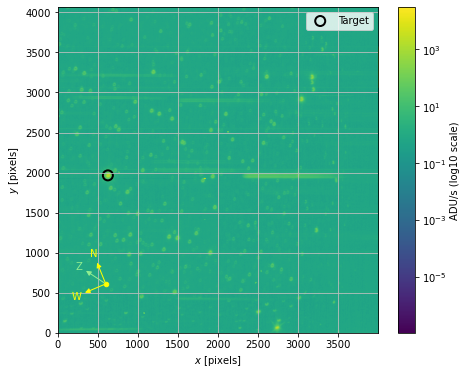

lsst.atmospec.spectraction INFO: Pixel value at centroid = 461.5603515625
lsst.atmospec.spectraction INFO: Rebinning image with rebin of 4


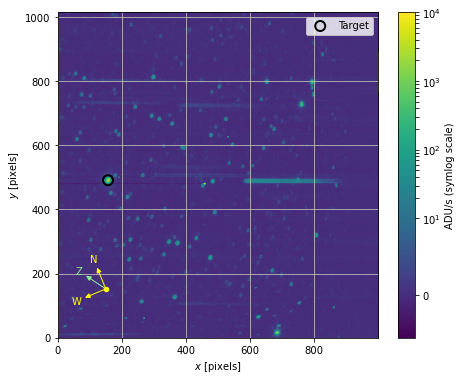

lsst.atmospec.spectraction INFO: Search for the target in the image...


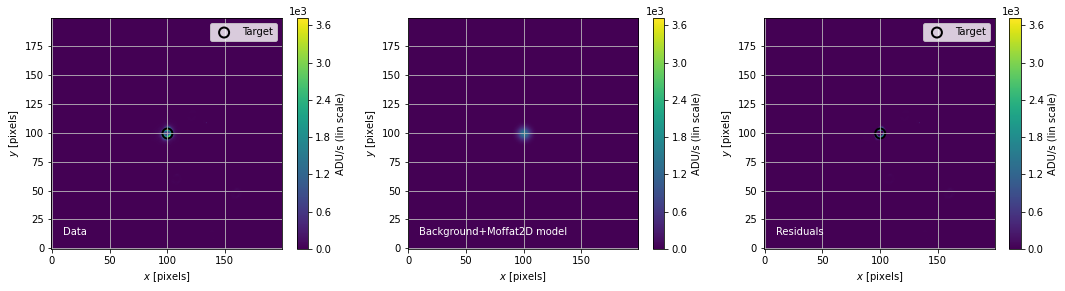

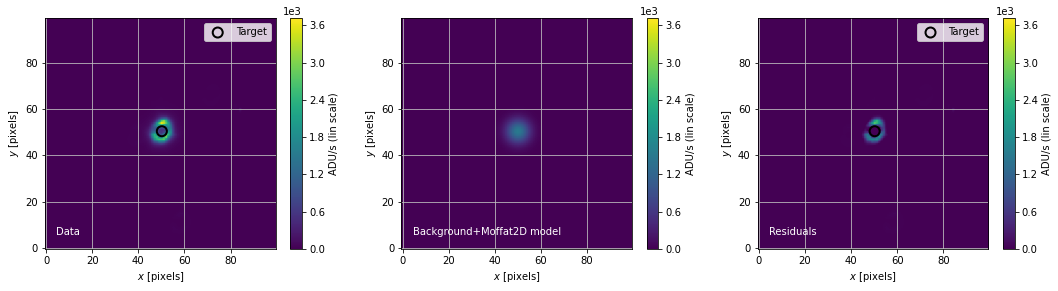

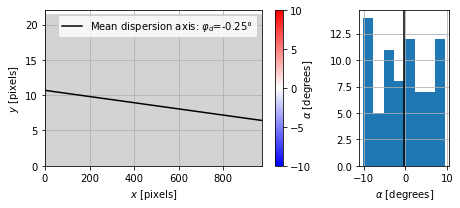

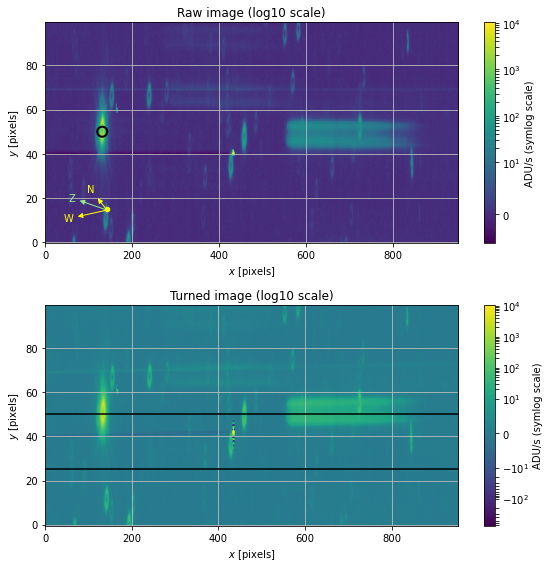

lsst.atmospec.spectraction INFO: Search for the target in the rotated image...


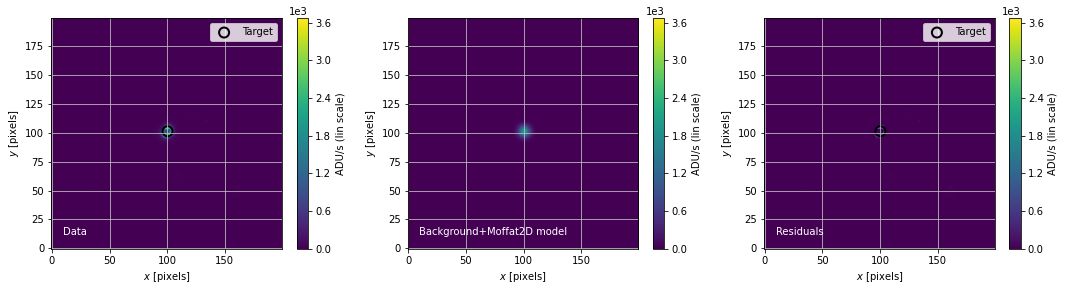

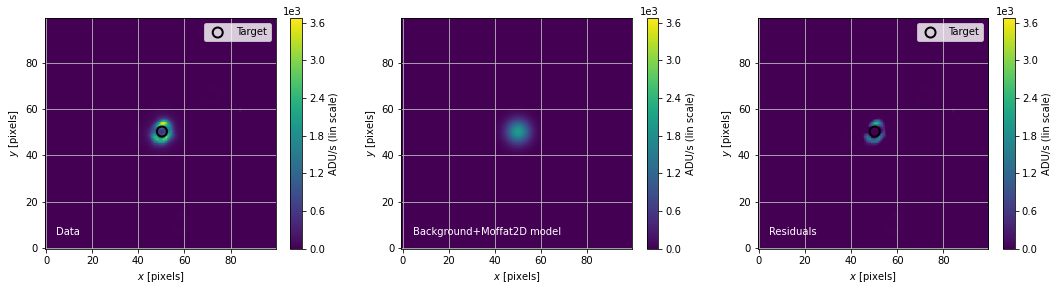

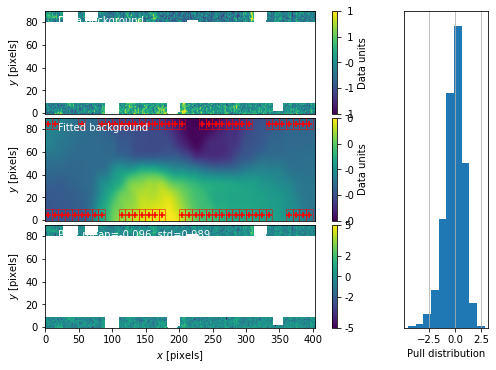

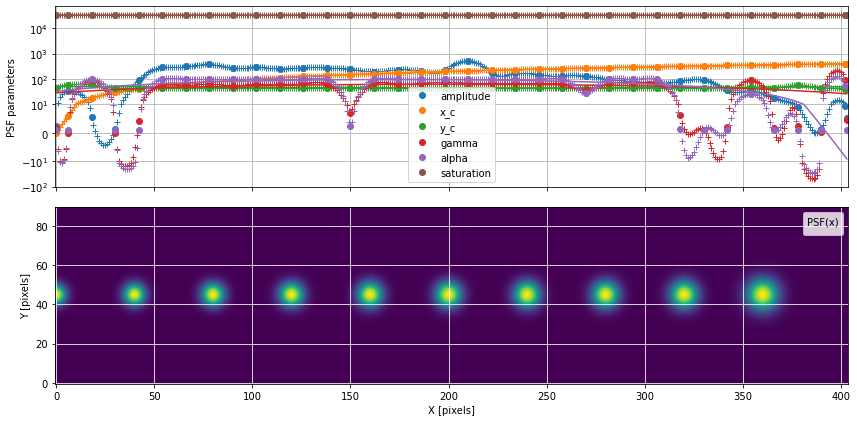

2021-09-13 12:49:31,009 spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: alpha_0 has a null Jacobian; parameter is fixed at its last known current value (-41.55259591689908).
2021-09-13 12:49:31,011 spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: alpha_1 has a null Jacobian; parameter is fixed at its last known current value (19.85118830613885).
2021-09-13 12:49:31,013 spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: alpha_2 has a null Jacobian; parameter is fixed at its last known current value (14.490698740067835).


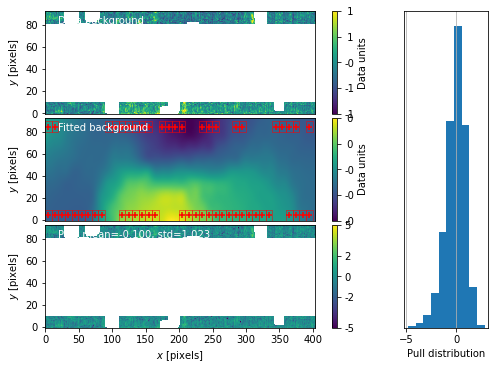

2021-09-13 12:50:13,351 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma_0 has a null Jacobian; parameter is fixed at its last known current value (89.90614050116912).
2021-09-13 12:50:13,448 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma_1 has a null Jacobian; parameter is fixed at its last known current value (-0.1542811415661439).
2021-09-13 12:50:13,450 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma_2 has a null Jacobian; parameter is fixed at its last known current value (-0.21579988063178357).
2021-09-13 12:50:13,451 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha_1 has a null Jacobian; parameter is fixed at its last known current value (1.206852477744912e-16).
2021-09-13 12:50:13,453 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha_2 has a null Jacobian; parameter is fixed at its last known current value (1.8193899583193585e-16).
/home/dagoret/repos/Spectractor/spectractor/fit/fit

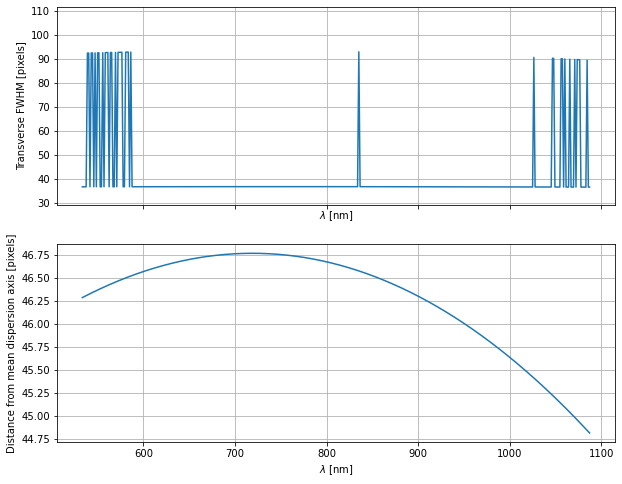

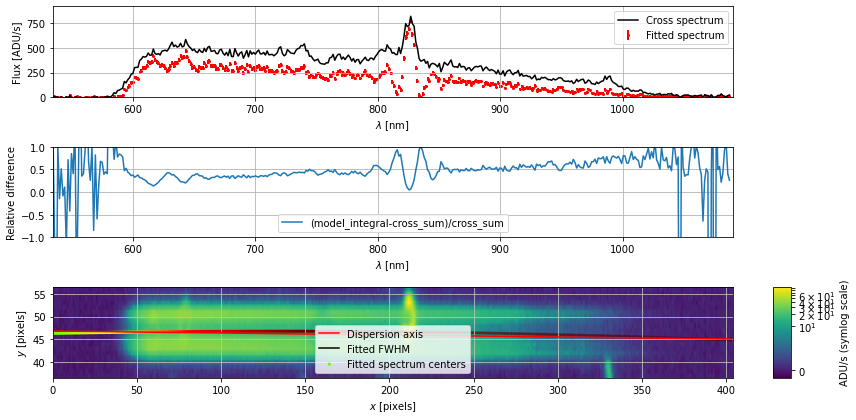

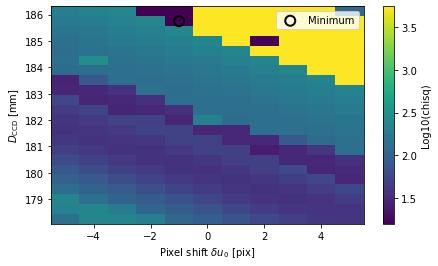

2021-09-13 12:55:48,848 Spectrum   convert_from_flam_to_ADUrate WARNING You ask to convert spectrum already in ADU/s in ADU/s... check your code ! Skip the instruction


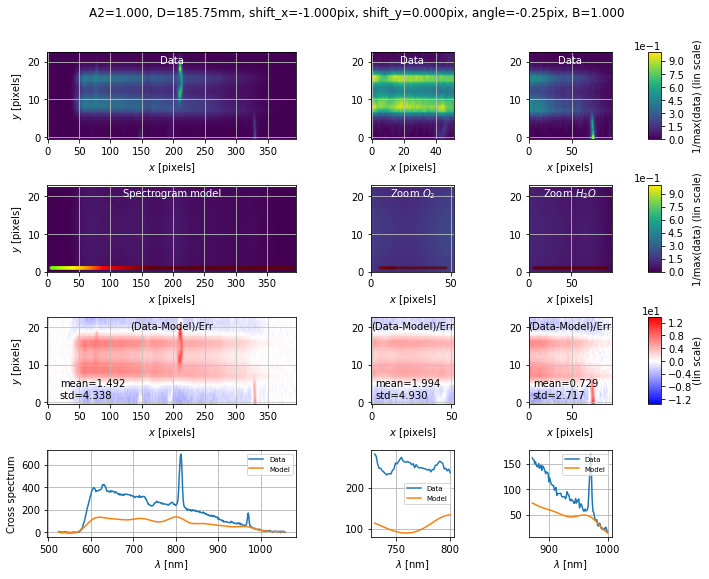

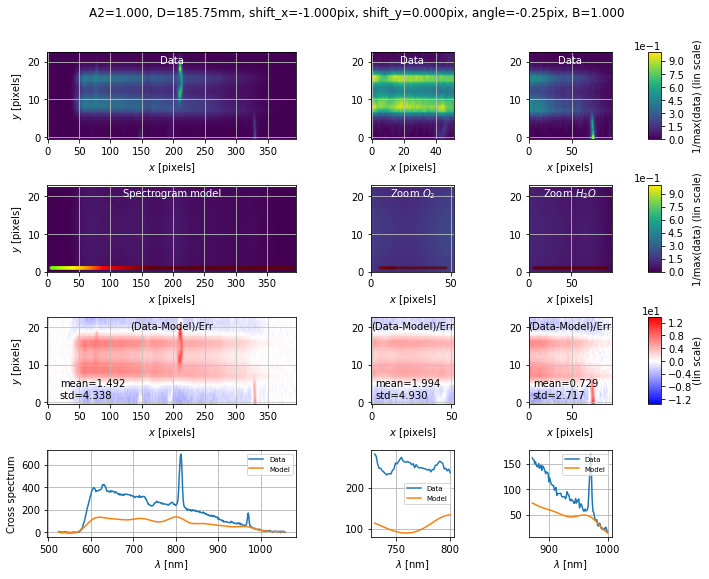

2021-09-13 12:56:24,453 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha_1 has a null Jacobian; parameter is fixed at its last known current value (1.9007961799275805e-15).
2021-09-13 12:56:24,552 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha_2 has a null Jacobian; parameter is fixed at its last known current value (3.0201730533491036e-15).
2021-09-13 12:56:46,348 spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: gamma_0 has a null Jacobian; parameter is fixed at its last known current value (1624.5124418765906).
2021-09-13 12:56:46,353 spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: gamma_1 has a null Jacobian; parameter is fixed at its last known current value (27.503508158134508).
2021-09-13 12:56:46,445 spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: gamma_2 has a null Jacobian; parameter is fixed at its last known current value (42.16000639854126).
2021-09-13 12:56:46,447 spectractor.fit.fitter gradie

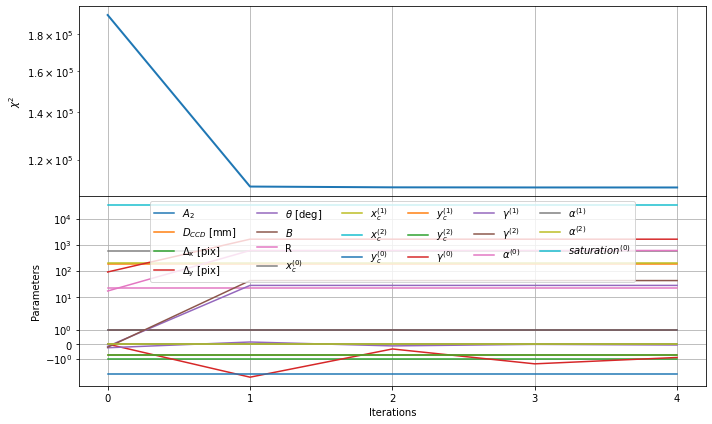

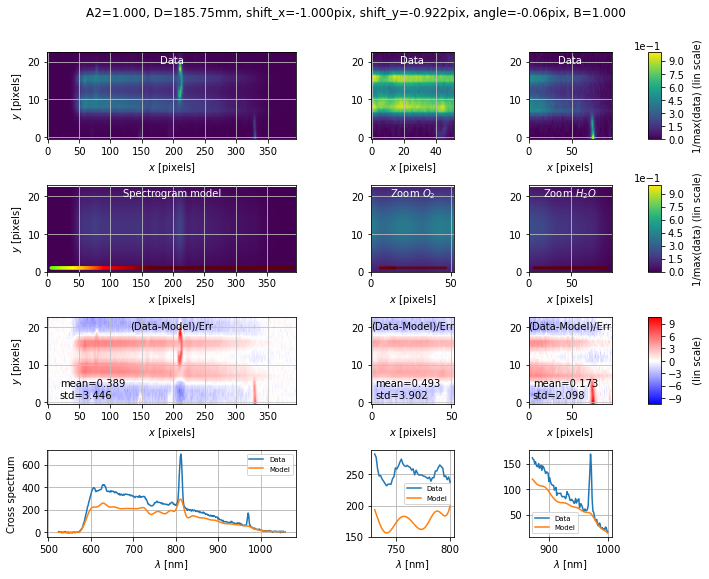

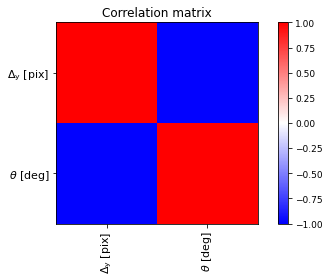

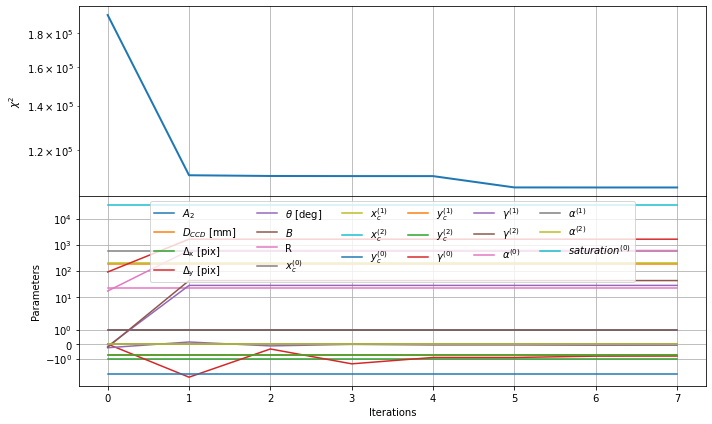

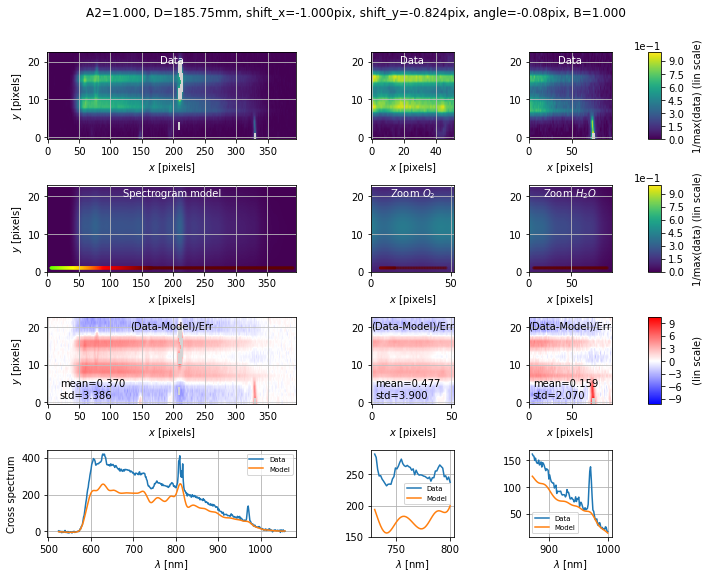

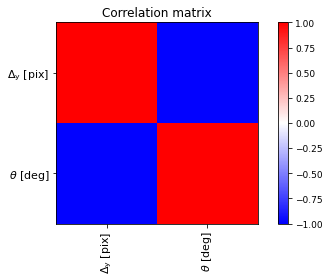

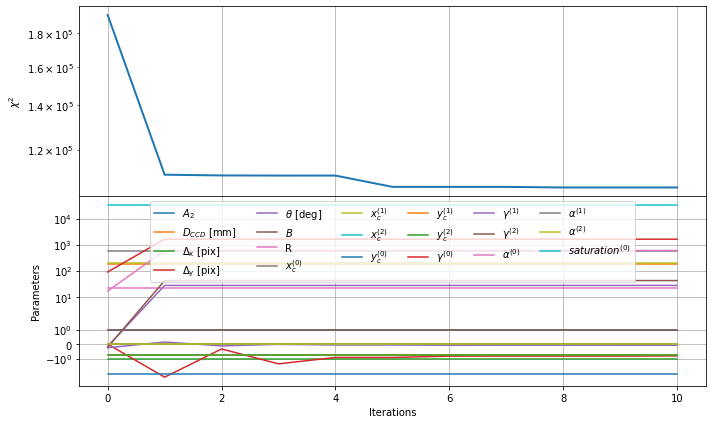

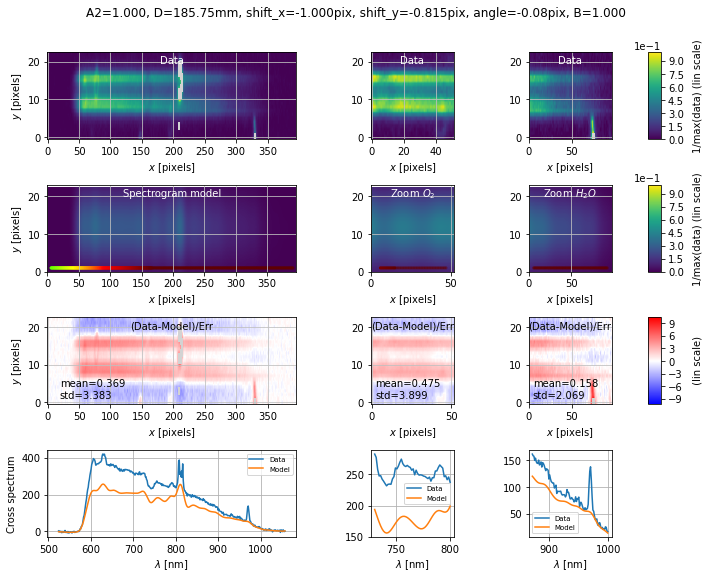

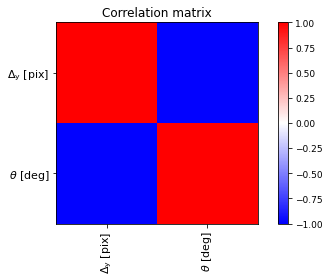

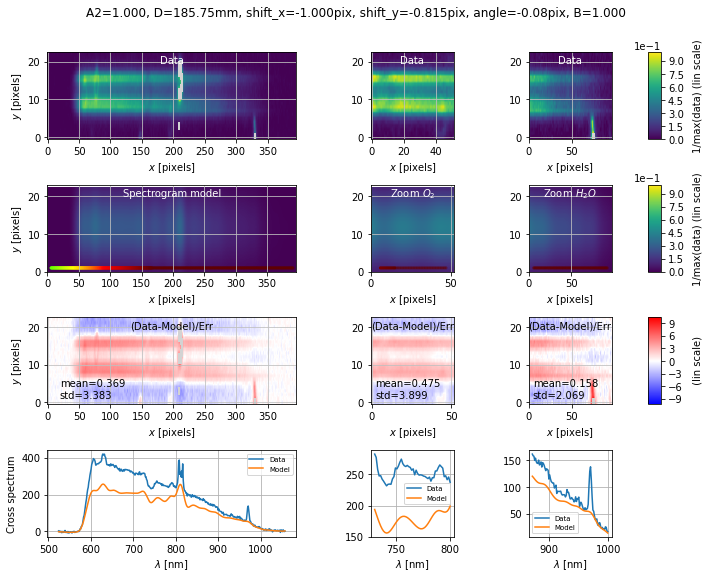

2021-09-13 12:58:57,160 Spectrum   calibrate_spectrum   WARNING 
	Minimum chisq is on the edge of the exploration grid.


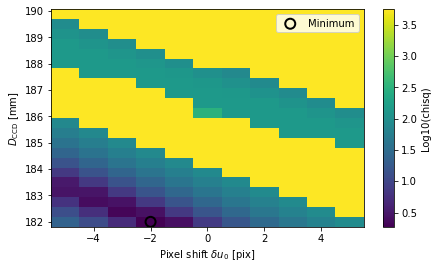

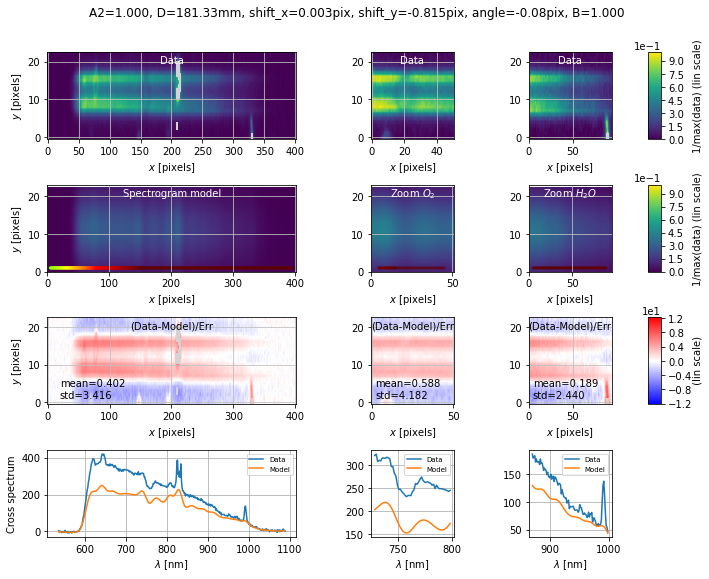

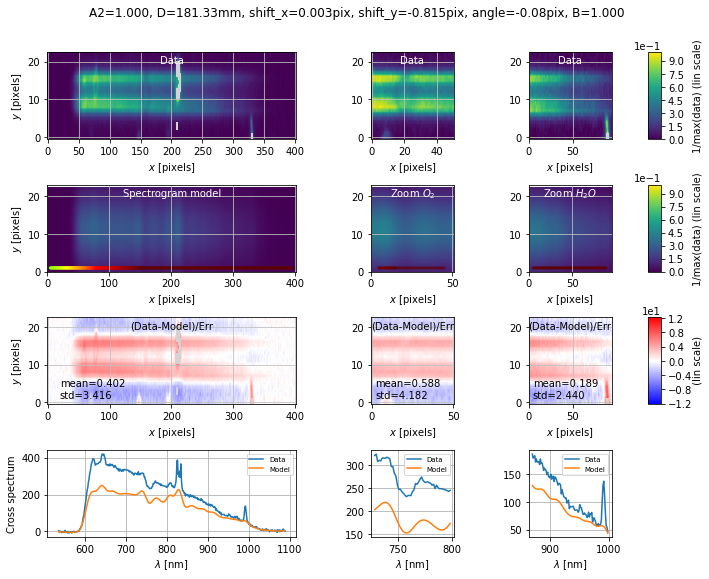

2021-09-13 12:59:53,150 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma_0 has a null Jacobian; parameter is fixed at its last known current value (1624.5124418765906).
2021-09-13 12:59:53,247 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma_1 has a null Jacobian; parameter is fixed at its last known current value (27.503508158134508).
2021-09-13 12:59:53,249 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma_2 has a null Jacobian; parameter is fixed at its last known current value (42.16000639854126).
2021-09-13 12:59:53,250 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha_0 has a null Jacobian; parameter is fixed at its last known current value (599.1238779752097).
2021-09-13 12:59:53,252 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha_1 has a null Jacobian; parameter is fixed at its last known current value (1.9007961799275805e-15).
2021-09-13 12:59:53,253 spectractor.fit.fitter gradient_de

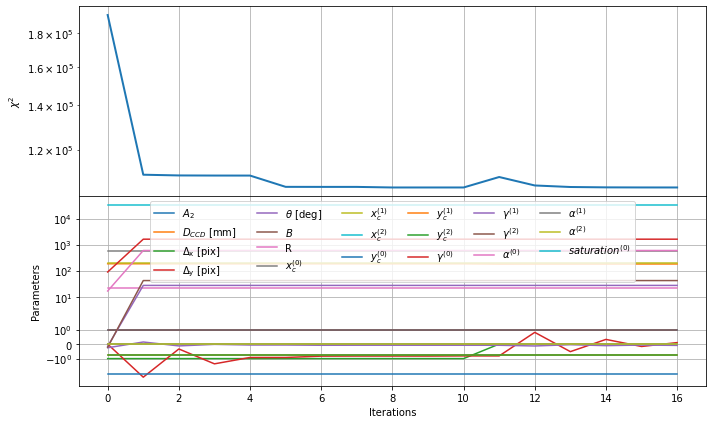

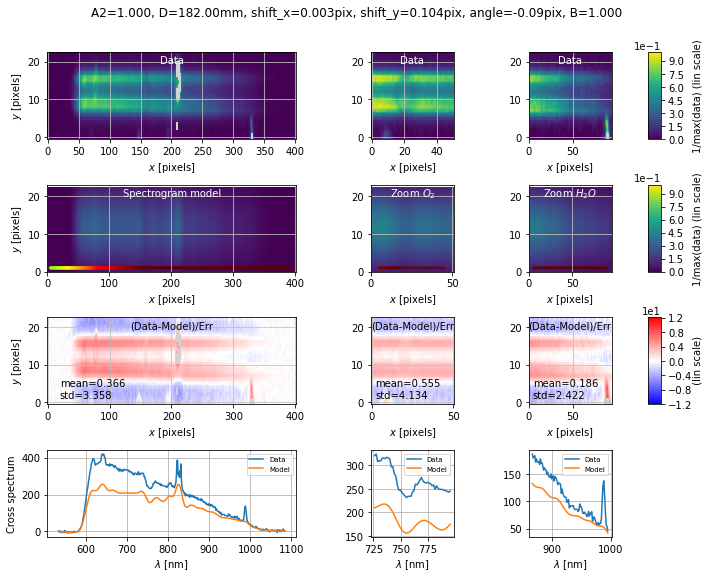

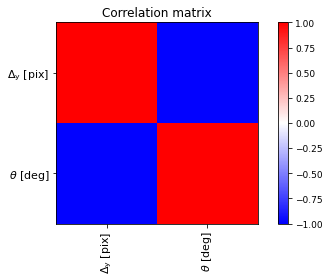

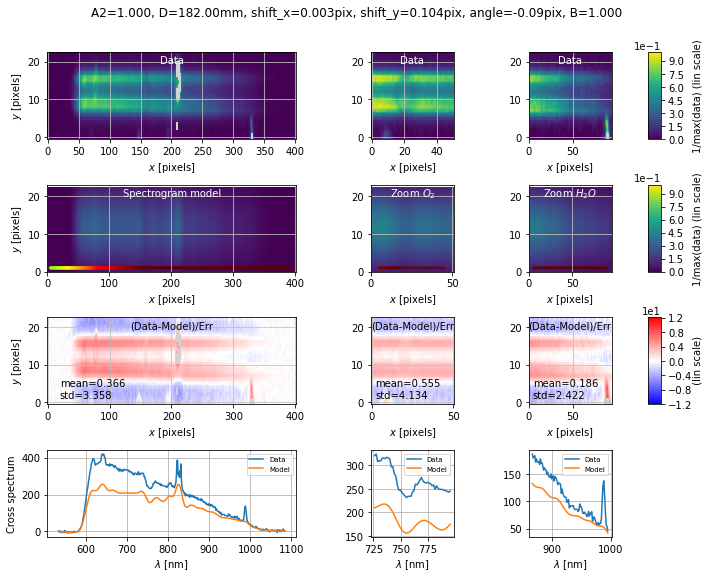

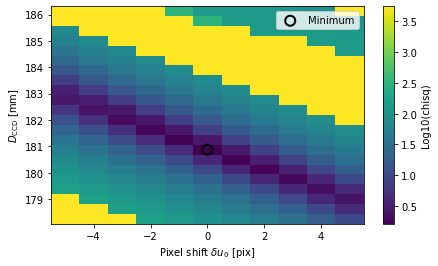

In [17]:
result = task.runDataRef(dataRef)

In [18]:
print("hello")

hello
